In [7]:
# load data
import pandas as pd

data = pd.read_csv('iris.csv')
df = data.copy()

# dispaly ten randomly selected samples
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
105,106,7.6,3.0,6.6,2.1,Iris-virginica
43,44,5.0,3.5,1.6,0.6,Iris-setosa
136,137,6.3,3.4,5.6,2.4,Iris-virginica
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
27,28,5.2,3.5,1.5,0.2,Iris-setosa
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
0,1,5.1,3.5,1.4,0.2,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [8]:
# remove irrelevant data and view data information
df.drop(columns='Id', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# check for missing values
print('Is there any NaN in the dataset: {}'.format(df.isnull().values.any()))

Is there any NaN in the dataset: False


In [14]:
# separate the features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
# split the dataset into training and testing sets, then display their shapes
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('X_train: {}'.format(np.shape(X_train)))
print('y_train: {}'.format(np.shape(y_train)))
print('X_test: {}'.format(np.shape(X_test)))
print('y_test: {}'.format(np.shape(y_test)))

X_train: (120, 4)
y_train: (120,)
X_test: (30, 4)
y_test: (30,)


In [ ]:
# build three classification models
# SVM, KNN, Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = dict()

models['SVM'] = SVC(kernel='rbf')  # kernel specifies the kernel type, 'rbf' is the radial basis function
models['KNeighbor'] = KNeighborsClassifier(n_neighbors=5)  # n_neighbors specifies the number of neighbors
models['RandomForest'] = RandomForestClassifier(n_estimators=100)  # n_estimators specifies the number of trees in the forest

In [ ]:
# define functions to evaluate the models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import numpy as np


def plot_cm(model, y_true, y_pred, name=None):
    """plot the confusion matrix
    :param model: the classification model
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :param name: the name of the model
    """
    _, ax = plt.subplots()
    if name is not None:
        ax.set_title(name)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.show()
    return None


def plot_cm_ratio(model, y_true, y_pred, name=None):
    """plot the confusion matrix (normalized)
    :param model: the classification model
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :param name: the name of the model
    """
    _, ax = plt.subplots()
    if name is not None:
        ax.set_title(name)
    cm = confusion_matrix(y_true, y_pred)
    cm_ratio = np.zeros(cm.shape)
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            cm_ratio[i, j] = cm[i, j] / cm[i].sum()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_ratio, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.show()
    return None


def model_perf(model, y_true, y_pred, name=None):
    """Print model accuracy, TPR, and FPR
    """
    if name is not None:
        print('For model {}: \n'.format(name))
    cm = confusion_matrix(y_true, y_pred)
    for i in range(len(model.classes_)):
        # tp: true positive, fp: false positive, fn: false negative, tn: true negative
        # tpr: true positive rate, fpr: false positive rate, acc: accuracy
        tp = cm[i, i]
        fp = cm[:, i].sum() - cm[i, i]
        fn = cm[i, :].sum() - cm[i, i]
        tn = cm.sum() - tp - fp - fn
        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)
        acc = (tp + tn) / cm.sum()
        print('For class {}: \n TPR is {}; \n FPR is {}; \n ACC is {}. \n'
        .format(model.classes_[i], tpr, fpr, acc))
    return None


def ovo_eval(model, name=None):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    plot_cm(model, y_test, prediction, name)
    plot_cm_ratio(model, y_test, prediction, name)
    model_perf(model, y_test, prediction, name)
    print('Overall Accuracy: {}'.format(model.score(X_test, y_test)))

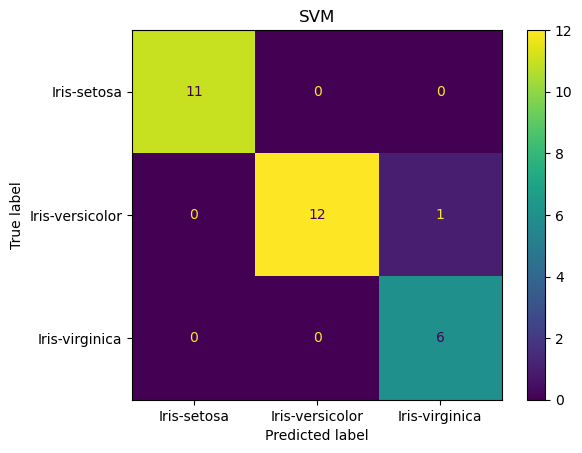

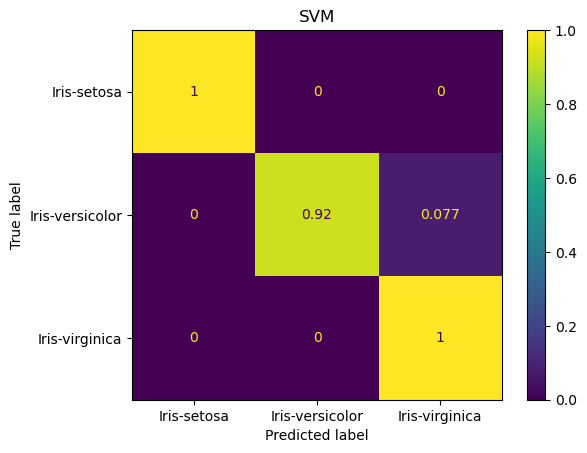

For model SVM: 

For class Iris-setosa: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

For class Iris-versicolor: 
 TPR is 0.9230769230769231; 
 FPR is 0.0; 
 ACC is 0.9666666666666667. 

For class Iris-virginica: 
 TPR is 1.0; 
 FPR is 0.041666666666666664; 
 ACC is 0.9666666666666667. 

Overall Accuracy: 0.9666666666666667


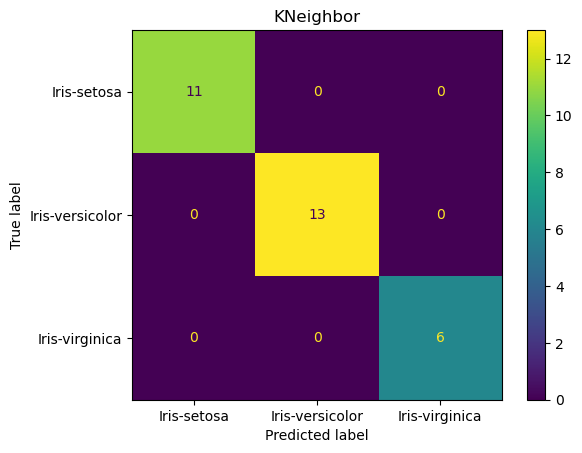

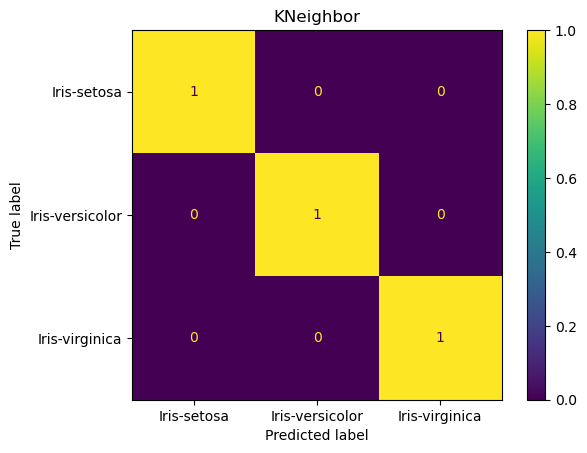

For model KNeighbor: 

For class Iris-setosa: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

For class Iris-versicolor: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

For class Iris-virginica: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

Overall Accuracy: 1.0


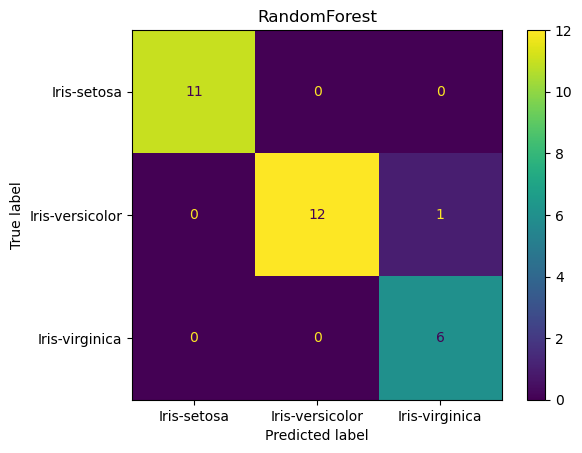

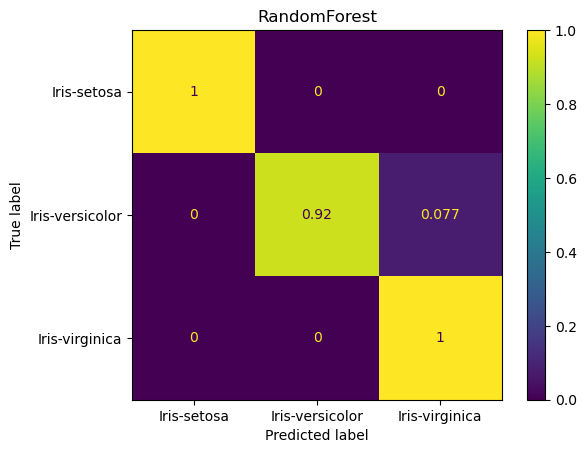

For model RandomForest: 

For class Iris-setosa: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

For class Iris-versicolor: 
 TPR is 0.9230769230769231; 
 FPR is 0.0; 
 ACC is 0.9666666666666667. 

For class Iris-virginica: 
 TPR is 1.0; 
 FPR is 0.041666666666666664; 
 ACC is 0.9666666666666667. 

Overall Accuracy: 0.9666666666666667


In [ ]:
# evaluate the performance of each model
for name, model in models.items():
    ovo_eval(model, name)